In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

Dataset Exploratory Analysis

Data Understanding

In [2]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

1081

Dropping duplicates might impact the weight the duplicated points has on the dataset.

In [8]:
df = df.drop_duplicates()

Feature Engineering

PCA is considered in this project since removing the redundant features can drastically help with the algorithm runtime, thus, resulting in faster research.

In [9]:
X = df.drop(['Class', 'Time'], axis=1)
Y = df.Class

To address the skewness of the dataset, Synthetic Minority Oversampling TEchnique (SMOTE) is implemented. However, class-weighting might also be an effective method as well.

In [10]:
smote = SMOTE(random_state=0, sampling_strategy=0.5)
X_resampled, Y_resampled = smote.fit_resample(X, Y)
resampled_df = pd.concat((X_resampled, Y_resampled), axis=1)
print(resampled_df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


Feature Understanding

Pairplotting the 5-relevant features to better understand how feature engineering change the dataset. Plotting all features can be done, however, the runtime of such operation is super costly.

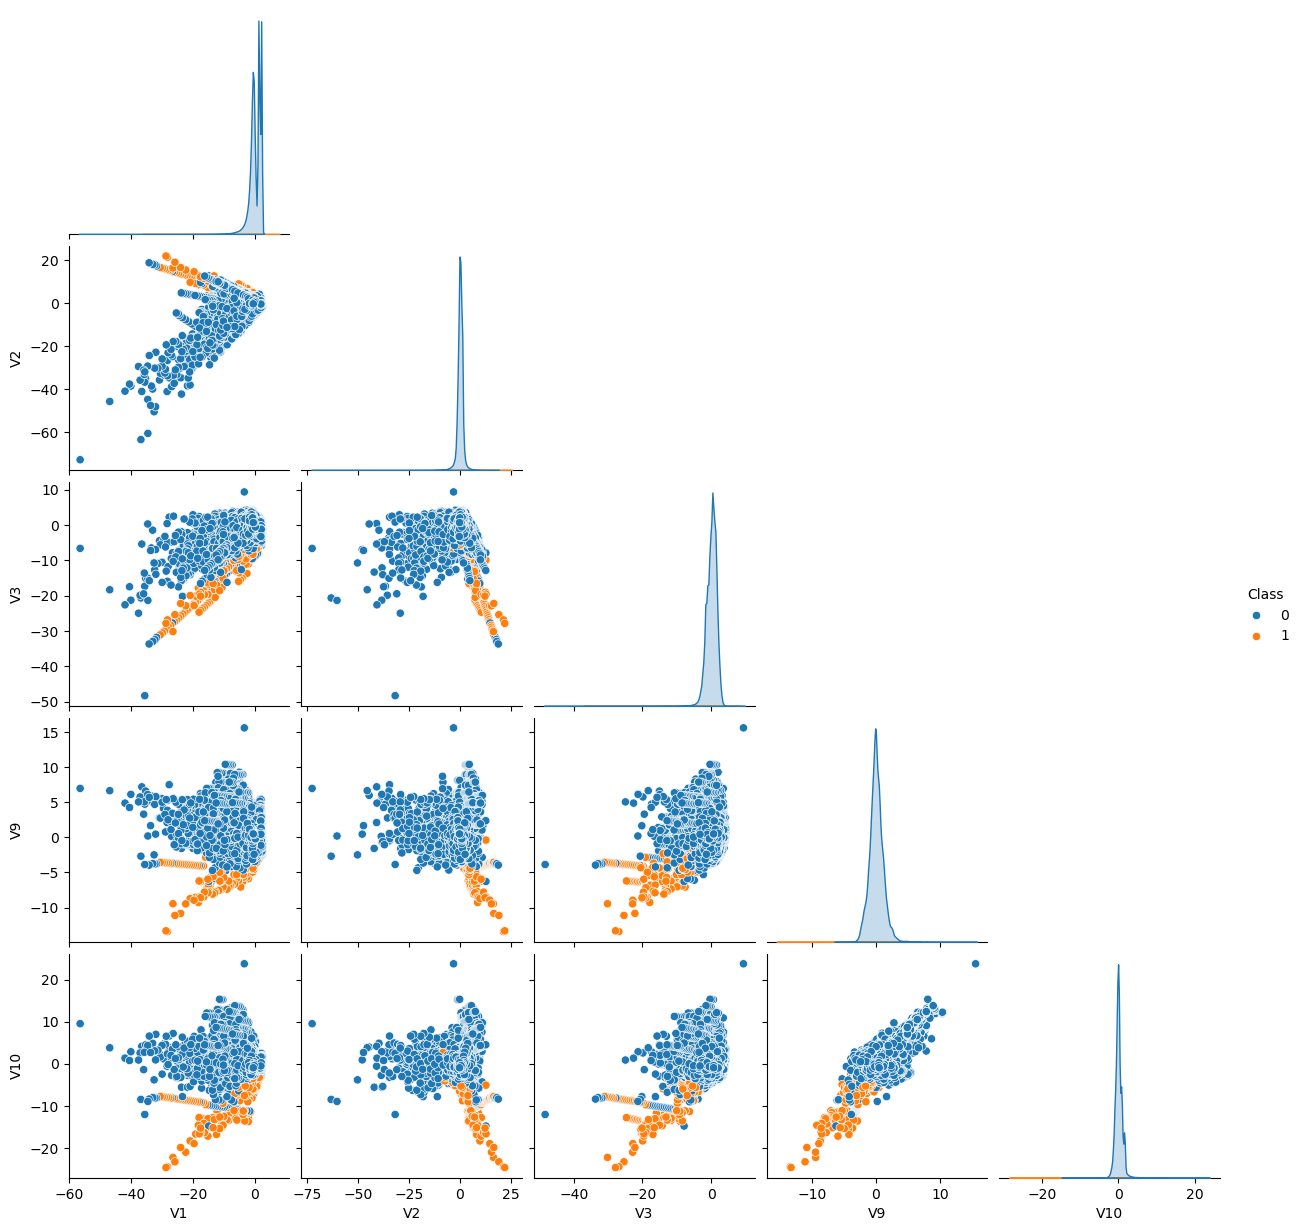

In [11]:
sns.pairplot(df, 
             hue="Class",
             vars=['V1','V2','V3','V9','V10'],
             corner=True)

There is a concern regarding the synthetic datapoints not accurately portraying the true relationships between the features. There might be datapoints that are just noise to the dataset and are disrupting the oversampling technique to model the correct distribution of the minority class.

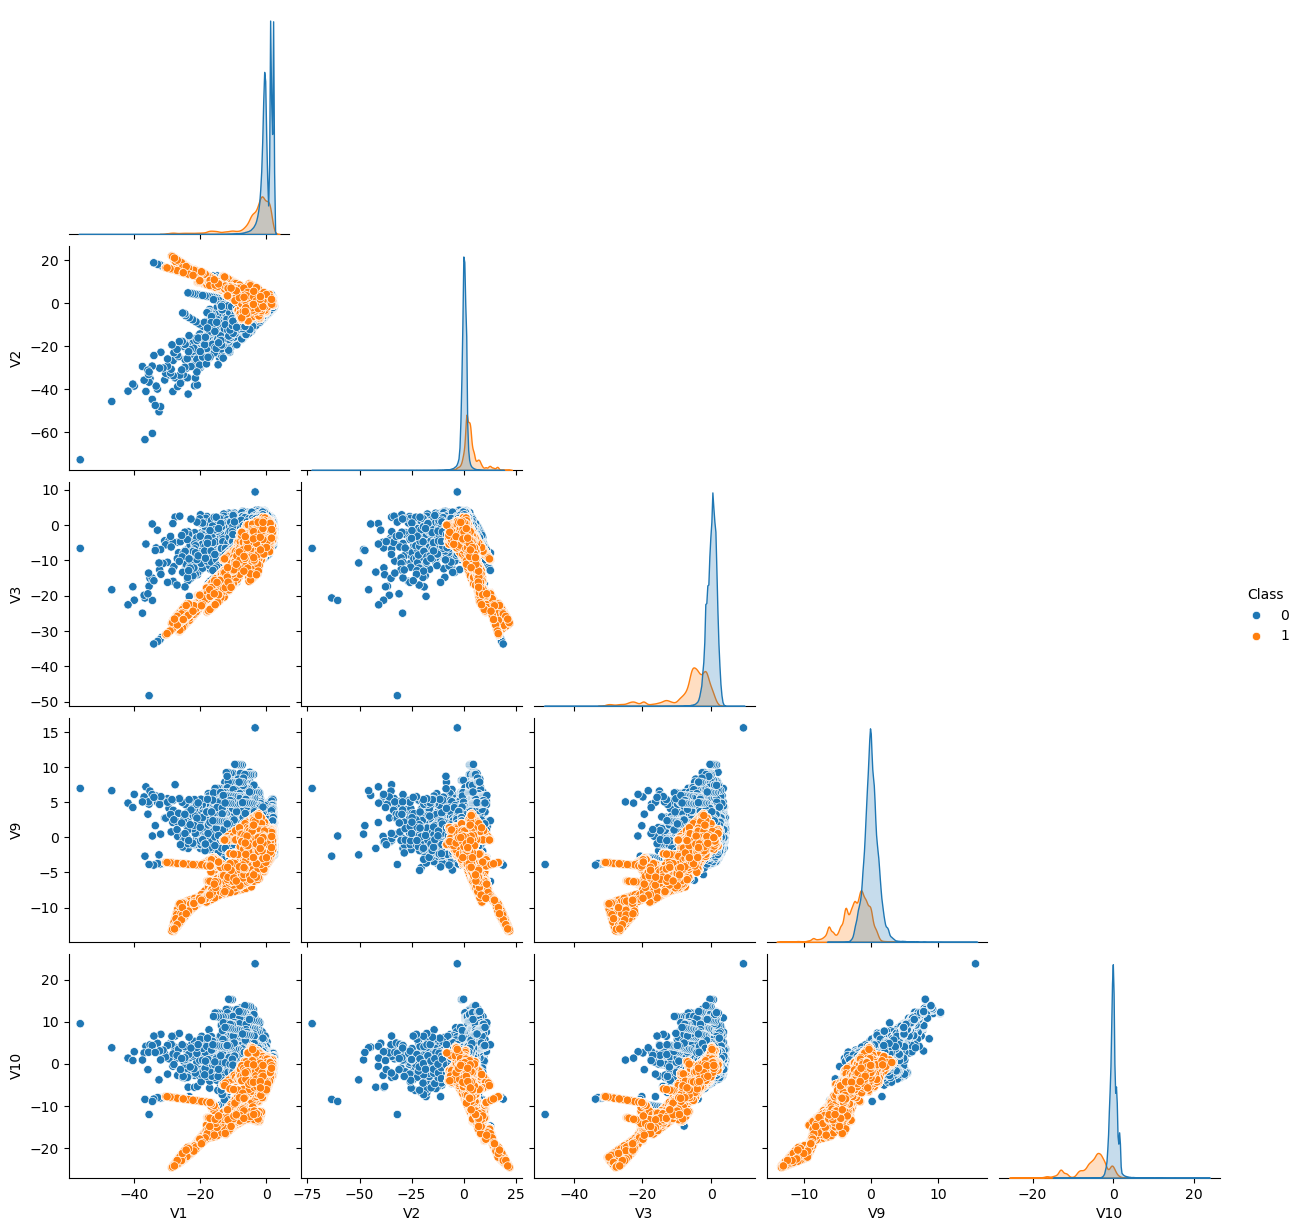

In [18]:
sns.pairplot(resampled_df, 
             hue="Class",
             vars=['V1','V2','V3','V9','V10'],
             corner=True)

Models Evaluation

The models' hyperparameters are temporarily tuned to reduce the runtime of the fitting process.

In [13]:
LogisticRegression_model = LogisticRegression(max_iter=5000, tol=1e-3)
RandomForest_model = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50)

Accuracy is highly a biased metric since the dataset is super skewed. Precision provide insights to how accurate is the model predictions of the positive class. Sensitivity display how well the model is able to identify the positive class (i.e. the minority class).

In [14]:
LogisticRegression_accuracies = []
LogisticRegression_precisions = []
LogisticRegression_sensitivities = []
LogisticRegression_f1_scores = []
LogisticRegression_auc_scores = []
LogisticRegression_avg_precision_scores = []

RandomForest_accuracies = []
RandomForest_precisions = []
RandomForest_sensitivities = []
RandomForest_f1_scores = []
RandomForest_auc_scores = []
RandomForest_avg_precision_scores = []

KFold of 10 folds is implemented to insure Bias & Variance are not too high.

In [15]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

The models are trained using the sampled dataset and tested with the original dataset to determine their performances.

In [22]:
for i, ((train_sampled_fold, test_sampled_fold), (train_original_fold, test_original_fold)) in enumerate(zip(kfold.split(X_resampled), kfold.split(X))):
  print("Fold", i)
  X_train, X_test, Y_train, Y_test = X_resampled.iloc[train_sampled_fold], X_resampled.iloc[test_original_fold], Y_resampled.iloc[train_sampled_fold], Y_resampled.iloc[test_original_fold]

  LogisticRegression_model.fit(X_train, Y_train)
  LogisticRegression_Y_pred = LogisticRegression_model.predict(X_test)
  LogisticRegression_Y_pred_proba = LogisticRegression_model.predict_proba(X_test)[:, 1]

  LogisticRegression_accuracies.append(accuracy_score(Y_test, LogisticRegression_Y_pred))
  LogisticRegression_precisions.append(precision_score(Y_test, LogisticRegression_Y_pred))
  LogisticRegression_sensitivities.append(recall_score(Y_test, LogisticRegression_Y_pred))
  LogisticRegression_f1_scores.append(f1_score(Y_test, LogisticRegression_Y_pred))
  LogisticRegression_auc_scores.append(roc_auc_score(Y_test, LogisticRegression_Y_pred_proba))
  LogisticRegression_avg_precision_scores.append(average_precision_score(Y_test, LogisticRegression_Y_pred_proba))


  RandomForest_model.fit(X_train, Y_train)
  RandomForest_Y_pred = RandomForest_model.predict(X_test)
  RandomForest_Y_pred_proba = RandomForest_model.predict_proba(X_test)[:, 1]

  RandomForest_accuracies.append(accuracy_score(Y_test, RandomForest_Y_pred))
  RandomForest_precisions.append(precision_score(Y_test, RandomForest_Y_pred))
  RandomForest_sensitivities.append(recall_score(Y_test, RandomForest_Y_pred))
  RandomForest_f1_scores.append(f1_score(Y_test, RandomForest_Y_pred))
  RandomForest_auc_scores.append(roc_auc_score(Y_test, RandomForest_Y_pred_proba))
  RandomForest_avg_precision_scores.append(average_precision_score(Y_test, RandomForest_Y_pred_proba))

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9


The mean and standard deviation is provided for better understanding of the models' performances, however, displaying the distributions might provide better insights to Bias & Variance in each model.

In [23]:
print(f"Logistic Regression Average Accuracy: {np.mean(LogisticRegression_accuracies):.3f} (+/- {np.std(LogisticRegression_accuracies):.3f})")
print(f"Logistic Regression Average Precision: {np.mean(LogisticRegression_precisions):.3f} (+/- {np.std(LogisticRegression_precisions):.3f})")
print(f"Logistic Regression Average Sensitivity: {np.mean(LogisticRegression_sensitivities):.3f} (+/- {np.std(LogisticRegression_sensitivities):.3f})")
print(f"Logistic Regression Average F1-score: {np.mean(LogisticRegression_f1_scores):.3f} (+/- {np.std(LogisticRegression_f1_scores):.3f})")
print(f"Logistic Regression Average AUC-ROC: {np.mean(LogisticRegression_auc_scores):.3f} (+/- {np.std(LogisticRegression_auc_scores):.3f})")
print(f"Logistic Regression Average Precision Score: {np.mean(LogisticRegression_avg_precision_scores):.3f} (+/- {np.std(LogisticRegression_avg_precision_scores):.3f})")

Logistic Regression Average Accuracy: 0.995 (+/- 0.004)
Logistic Regression Average Precision: 0.487 (+/- 0.345)
Logistic Regression Average Sensitivity: 0.749 (+/- 0.150)
Logistic Regression Average F1-score: 0.476 (+/- 0.230)
Logistic Regression Average AUC-ROC: 0.960 (+/- 0.032)
Logistic Regression Average Precision Score: 0.710 (+/- 0.082)


In [20]:
print(f"Random Forest Average Accuracy: {np.mean(RandomForest_accuracies):.3f} (+/- {np.std(RandomForest_accuracies):.3f})")
print(f"Random Forest Average Precision: {np.mean(RandomForest_precisions):.3f} (+/- {np.std(RandomForest_precisions):.3f})")
print(f"Random Forest Average Sensitivity: {np.mean(RandomForest_sensitivities):.3f} (+/- {np.std(RandomForest_sensitivities):.3f})")
print(f"Random Forest Average F1-score: {np.mean(RandomForest_f1_scores):.3f} (+/- {np.std(RandomForest_f1_scores):.3f})")
print(f"Random Forest Average AUC-ROC: {np.mean(RandomForest_auc_scores):.3f} (+/- {np.std(RandomForest_auc_scores):.3f})")
print(f"Random Forest Average Precision Score: {np.mean(RandomForest_avg_precision_scores):.3f} (+/- {np.std(RandomForest_avg_precision_scores):.3f})")

Random Forest Average Accuracy: 0.999 (+/- 0.000)
Random Forest Average Precision: 0.918 (+/- 0.057)
Random Forest Average Sensitivity: 0.720 (+/- 0.047)
Random Forest Average F1-score: 0.806 (+/- 0.040)
Random Forest Average AUC-ROC: 0.958 (+/- 0.022)
Random Forest Average Precision Score: 0.802 (+/- 0.052)


In [28]:
LogisticRegression_accuracies = []
LogisticRegression_precisions = []
LogisticRegression_sensitivities = []
LogisticRegression_f1_scores = []
LogisticRegression_auc_scores = []
LogisticRegression_avg_precision_scores = []

RandomForest_accuracies = []
RandomForest_precisions = []
RandomForest_sensitivities = []
RandomForest_f1_scores = []
RandomForest_auc_scores = []
RandomForest_avg_precision_scores = []

In [29]:
LogisticRegression_model = LogisticRegression(max_iter=5000, tol=1e-3, class_weight="balanced")
RandomForest_model = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50, class_weight="balanced")

In [30]:
for i, (train_original_fold, test_original_fold) in enumerate(kfold.split(X)):
  print("Fold", i)
  X_train, X_test, Y_train, Y_test = X_resampled.iloc[train_original_fold], X_resampled.iloc[test_original_fold], Y_resampled.iloc[train_original_fold], Y_resampled.iloc[test_original_fold]

  LogisticRegression_model.fit(X_train, Y_train)
  LogisticRegression_Y_pred = LogisticRegression_model.predict(X_test)
  LogisticRegression_Y_pred_proba = LogisticRegression_model.predict_proba(X_test)[:, 1]

  LogisticRegression_accuracies.append(accuracy_score(Y_test, LogisticRegression_Y_pred))
  LogisticRegression_precisions.append(precision_score(Y_test, LogisticRegression_Y_pred))
  LogisticRegression_sensitivities.append(recall_score(Y_test, LogisticRegression_Y_pred))
  LogisticRegression_f1_scores.append(f1_score(Y_test, LogisticRegression_Y_pred))
  LogisticRegression_auc_scores.append(roc_auc_score(Y_test, LogisticRegression_Y_pred_proba))
  LogisticRegression_avg_precision_scores.append(average_precision_score(Y_test, LogisticRegression_Y_pred_proba))


  RandomForest_model.fit(X_train, Y_train)
  RandomForest_Y_pred = RandomForest_model.predict(X_test)
  RandomForest_Y_pred_proba = RandomForest_model.predict_proba(X_test)[:, 1]

  RandomForest_accuracies.append(accuracy_score(Y_test, RandomForest_Y_pred))
  RandomForest_precisions.append(precision_score(Y_test, RandomForest_Y_pred))
  RandomForest_sensitivities.append(recall_score(Y_test, RandomForest_Y_pred))
  RandomForest_f1_scores.append(f1_score(Y_test, RandomForest_Y_pred))
  RandomForest_auc_scores.append(roc_auc_score(Y_test, RandomForest_Y_pred_proba))
  RandomForest_avg_precision_scores.append(average_precision_score(Y_test, RandomForest_Y_pred_proba))

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9


In [31]:
print(f"Logistic Regression Average Accuracy: {np.mean(LogisticRegression_accuracies):.3f} (+/- {np.std(LogisticRegression_accuracies):.3f})")
print(f"Logistic Regression Average Precision: {np.mean(LogisticRegression_precisions):.3f} (+/- {np.std(LogisticRegression_precisions):.3f})")
print(f"Logistic Regression Average Sensitivity: {np.mean(LogisticRegression_sensitivities):.3f} (+/- {np.std(LogisticRegression_sensitivities):.3f})")
print(f"Logistic Regression Average F1-score: {np.mean(LogisticRegression_f1_scores):.3f} (+/- {np.std(LogisticRegression_f1_scores):.3f})")
print(f"Logistic Regression Average AUC-ROC: {np.mean(LogisticRegression_auc_scores):.3f} (+/- {np.std(LogisticRegression_auc_scores):.3f})")
print(f"Logistic Regression Average Precision Score: {np.mean(LogisticRegression_avg_precision_scores):.3f} (+/- {np.std(LogisticRegression_avg_precision_scores):.3f})")

Logistic Regression Average Accuracy: 0.976 (+/- 0.002)
Logistic Regression Average Precision: 0.059 (+/- 0.008)
Logistic Regression Average Sensitivity: 0.909 (+/- 0.052)
Logistic Regression Average F1-score: 0.111 (+/- 0.014)
Logistic Regression Average AUC-ROC: 0.978 (+/- 0.012)
Logistic Regression Average Precision Score: 0.720 (+/- 0.088)


In [33]:
print(f"Random Forest Average Accuracy: {np.mean(RandomForest_accuracies):.3f} (+/- {np.std(RandomForest_accuracies):.3f})")
print(f"Random Forest Average Precision: {np.mean(RandomForest_precisions):.3f} (+/- {np.std(RandomForest_precisions):.3f})")
print(f"Random Forest Average Sensitivity: {np.mean(RandomForest_sensitivities):.3f} (+/- {np.std(RandomForest_sensitivities):.3f})")
print(f"Random Forest Average F1-score: {np.mean(RandomForest_f1_scores):.3f} (+/- {np.std(RandomForest_f1_scores):.3f})")
print(f"Random Forest Average AUC-ROC: {np.mean(RandomForest_auc_scores):.3f} (+/- {np.std(RandomForest_auc_scores):.3f})")
print(f"Random Forest Average Precision Score: {np.mean(RandomForest_avg_precision_scores):.3f} (+/- {np.std(RandomForest_avg_precision_scores):.3f})")

Random Forest Average Accuracy: 0.997 (+/- 0.000)
Random Forest Average Precision: 0.358 (+/- 0.054)
Random Forest Average Sensitivity: 0.849 (+/- 0.060)
Random Forest Average F1-score: 0.501 (+/- 0.054)
Random Forest Average AUC-ROC: 0.978 (+/- 0.013)
Random Forest Average Precision Score: 0.729 (+/- 0.081)
